In [25]:
import stackview
import matplotlib.pyplot as plt
from tifffile import imread
import pandas as pd
import numpy as np 
import os
import seaborn as sns 
import sys
from matplotlib import animation
from IPython.display import HTML

In [26]:
im_w2 = imread('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/images/20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif')
im_w1 = imread('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/images/20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif')

In [27]:
im_w2_test = np.max(im_w2,axis=1)
im_w1_test = np.max(im_w1,axis=1)

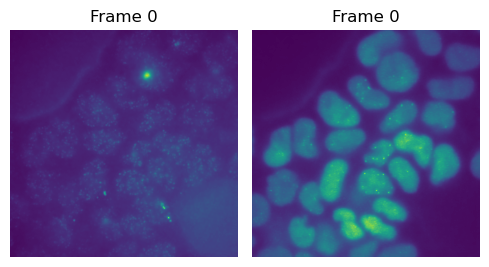

In [29]:
fig, ax = plt.subplots(1,2,figsize=(5, 5))
for a in ax:
    a.axis('off')
im = ax[0].imshow(im_w1_test[0,...], interpolation='bilinear',animated = True)
over = ax[1].imshow(im_w2_test[0,...], interpolation='bilinear')

fig.tight_layout()

def update(t):
    im.set_data(A_anim[t,...])
    over.set_data(A_anim_2[t,...])
    for a in ax:
        a.set_title(f'Frame {0+t}')
    return [im,over]


nb_times_im = np.shape(im_w1_test)[0]

A_anim = im_w1_test[::im_w1_test.shape[0]//nb_times_im ,...]
A_anim_2 = im_w2_test[::im_w1_test.shape[0]//nb_times_im ,...]

anim = animation.FuncAnimation(fig, update,
                               frames=nb_times_im, interval=50, 
                               blit=True)
# HTML(anim.to_jshtml())


In [30]:
f = "plots/test_gif.gif"
writergif = animation.PillowWriter(fps=10) 
anim.save(f, writer=writergif)